# CNN Filter Visulization 

## 1. Load the required Libraries and Download the Model

In [1]:
import tensorflow as tf 
import math
import numpy
import matplotlib.pyplot as plt

print('Tensorflow version', tf.__version__)

Tensorflow version 2.7.0


In [2]:
model = tf.keras.applications.vgg16.VGG16(
    include_top = False, # Final Fully connected layers in CNN not inclued in the model
    weights ='imagenet', # CNN model trained on the given weights
    input_shape =(96,96,3) # 96 rows and columns and 3 channels

)

model.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 96, 96, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 96, 96, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 48, 48, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 48, 48, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 48, 48, 128)       147584    
                                                              

## 2. Create the Submodel 

In [3]:
def get_submodel(name):
  return tf.keras.models.Model(
      model.input, 
      model.get_layer(name).output)

get_submodel('block2_conv1').summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 96, 96, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 96, 96, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 48, 48, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 48, 48, 128)       73856     
                                                                 
Total params: 112,576
Trainable params: 112,576
Non-trainable params: 0
_________________________________________________________________


## 3. Generate the random Image and use it for visuliszation

In [4]:
def create_image():
  return tf.random.uniform((96,96,3))

def plot(image, title ='Random Generated Image'):
  image = image -tf.math.reduce_min(image)
  image = image / tf.math.reduce_max(image) #scaling the image for values between 0 & 1
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
  plt.title(title)
  plt.show()


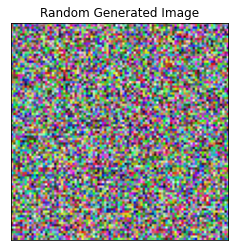

In [5]:
image =create_image()
plot(image)

## 4. Create the Model Algorithm used for the Submodel 

In [6]:
def filter_visulise(layer_name, filter_index =None, max_iters = 500):
  submodel =get_submodel(layer_name)
  num_filters = submodel.output.shape[-1]

  if filter_index is None:
    filter_index =tf.experimental.numpy.random.randint(0,num_filters -1)
  assert num_filters > filter_index, 'Filer_index is out of bonds'
  
  # Show loss as given loss_step 
  image =create_image()
  loss_step =int(max_iters / 50)
  
  # Gradient Ascent 
  for i in range(0,max_iters):
    with tf.GradientTape() as tape:
      tape.watch(image)
      out = submodel(tf.expand_dims(image,axis=0))[:,:,:,filter_index]
      loss = tf.math.reduce_mean(out)
    gradient = tape.gradient(loss,image)
    gradient =tf.math.l2_normalize(gradient)
    image = image + gradient * 0.1 

    if (i + 1) % loss_step == 0:
      print(f'Iteration: {i + 1}, Loss : {loss.numpy():4f}')


  plot(image, f'{layer_name},{filter_index}')
  

## 5. Run the Model and Visulize the Results 

Try running on different layer names to see what happens

In [7]:
print([layer.name for layer in model.layers if 'conv' in layer.name])

['block1_conv1', 'block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block5_conv1', 'block5_conv2', 'block5_conv3']


Iteration: 10, Loss : 0.784250
Iteration: 20, Loss : 0.790890
Iteration: 30, Loss : 0.797697
Iteration: 40, Loss : 0.804645
Iteration: 50, Loss : 0.811732
Iteration: 60, Loss : 0.819007
Iteration: 70, Loss : 0.826473
Iteration: 80, Loss : 0.834092
Iteration: 90, Loss : 0.841885
Iteration: 100, Loss : 0.849853
Iteration: 110, Loss : 0.857973
Iteration: 120, Loss : 0.866226
Iteration: 130, Loss : 0.874616
Iteration: 140, Loss : 0.883193
Iteration: 150, Loss : 0.891955
Iteration: 160, Loss : 0.900896
Iteration: 170, Loss : 0.909960
Iteration: 180, Loss : 0.919155
Iteration: 190, Loss : 0.928473
Iteration: 200, Loss : 0.937900
Iteration: 210, Loss : 0.947431
Iteration: 220, Loss : 0.957054
Iteration: 230, Loss : 0.966770
Iteration: 240, Loss : 0.976601
Iteration: 250, Loss : 0.986535
Iteration: 260, Loss : 0.996555
Iteration: 270, Loss : 1.006666
Iteration: 280, Loss : 1.016888
Iteration: 290, Loss : 1.027222
Iteration: 300, Loss : 1.037655
Iteration: 310, Loss : 1.048190
Iteration: 320, L

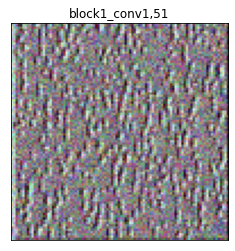

In [8]:
layer_name = 'block1_conv1' #param [''block1_conv1','block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block4_conv1', 'block4_conv2', 'block5_conv1', 'block5_conv2', 'block5_conv3']
filter_visulise(layer_name)

Iteration: 10, Loss : 5.858795
Iteration: 20, Loss : 6.156681
Iteration: 30, Loss : 6.454933
Iteration: 40, Loss : 6.753486
Iteration: 50, Loss : 7.052254
Iteration: 60, Loss : 7.350891
Iteration: 70, Loss : 7.649240
Iteration: 80, Loss : 7.947186
Iteration: 90, Loss : 8.244611
Iteration: 100, Loss : 8.541446
Iteration: 110, Loss : 8.837603
Iteration: 120, Loss : 9.132970
Iteration: 130, Loss : 9.427507
Iteration: 140, Loss : 9.721080
Iteration: 150, Loss : 10.013692
Iteration: 160, Loss : 10.305245
Iteration: 170, Loss : 10.595668
Iteration: 180, Loss : 10.885016
Iteration: 190, Loss : 11.173192
Iteration: 200, Loss : 11.460180
Iteration: 210, Loss : 11.745991
Iteration: 220, Loss : 12.030644
Iteration: 230, Loss : 12.314141
Iteration: 240, Loss : 12.596527
Iteration: 250, Loss : 12.877871
Iteration: 260, Loss : 13.158152
Iteration: 270, Loss : 13.437489
Iteration: 280, Loss : 13.715939
Iteration: 290, Loss : 13.993551
Iteration: 300, Loss : 14.270396
Iteration: 310, Loss : 14.546474


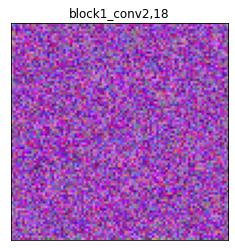

In [9]:
layer_name = 'block1_conv2' #param [''block1_conv1','block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block4_conv1', 'block4_conv2', 'block5_conv1', 'block5_conv2', 'block5_conv3']
filter_visulise(layer_name)

Iteration: 10, Loss : 8.105502
Iteration: 20, Loss : 9.963786
Iteration: 30, Loss : 11.751951
Iteration: 40, Loss : 13.458977
Iteration: 50, Loss : 15.074802
Iteration: 60, Loss : 16.615818
Iteration: 70, Loss : 18.099998
Iteration: 80, Loss : 19.558876
Iteration: 90, Loss : 20.966942
Iteration: 100, Loss : 22.301401
Iteration: 110, Loss : 23.588036
Iteration: 120, Loss : 24.819792
Iteration: 130, Loss : 26.009539
Iteration: 140, Loss : 27.159838
Iteration: 150, Loss : 28.266726
Iteration: 160, Loss : 29.351488
Iteration: 170, Loss : 30.426924
Iteration: 180, Loss : 31.472229
Iteration: 190, Loss : 32.479725
Iteration: 200, Loss : 33.463818
Iteration: 210, Loss : 34.434124
Iteration: 220, Loss : 35.386505
Iteration: 230, Loss : 36.330082
Iteration: 240, Loss : 37.259567
Iteration: 250, Loss : 38.171352
Iteration: 260, Loss : 39.062786
Iteration: 270, Loss : 39.936691
Iteration: 280, Loss : 40.795513
Iteration: 290, Loss : 41.638954
Iteration: 300, Loss : 42.464458
Iteration: 310, Loss 

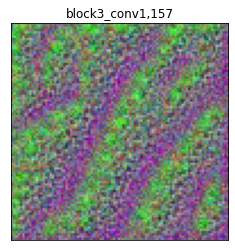

In [10]:
layer_name = 'block3_conv1' #param [''block1_conv1','block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block4_conv1', 'block4_conv2', 'block5_conv1', 'block5_conv2', 'block5_conv3']
filter_visulise(layer_name)

Iteration: 10, Loss : 1.371170
Iteration: 20, Loss : 2.904049
Iteration: 30, Loss : 4.546204
Iteration: 40, Loss : 6.241271
Iteration: 50, Loss : 7.900932
Iteration: 60, Loss : 9.531157
Iteration: 70, Loss : 11.131031
Iteration: 80, Loss : 12.666299
Iteration: 90, Loss : 14.156609
Iteration: 100, Loss : 15.607747
Iteration: 110, Loss : 16.980059
Iteration: 120, Loss : 18.269550
Iteration: 130, Loss : 19.538673
Iteration: 140, Loss : 20.772875
Iteration: 150, Loss : 21.961794
Iteration: 160, Loss : 23.109056
Iteration: 170, Loss : 24.210558
Iteration: 180, Loss : 25.272829
Iteration: 190, Loss : 26.309799
Iteration: 200, Loss : 27.302435
Iteration: 210, Loss : 28.250610
Iteration: 220, Loss : 29.168566
Iteration: 230, Loss : 30.056051
Iteration: 240, Loss : 30.916056
Iteration: 250, Loss : 31.769701
Iteration: 260, Loss : 32.612785
Iteration: 270, Loss : 33.431961
Iteration: 280, Loss : 34.234585
Iteration: 290, Loss : 35.032578
Iteration: 300, Loss : 35.817524
Iteration: 310, Loss : 36

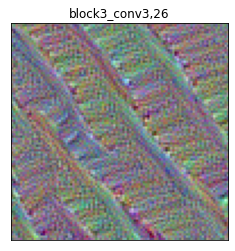

In [11]:
layer_name = 'block3_conv3' #param [''block1_conv1','block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block4_conv1', 'block4_conv2', 'block5_conv1', 'block5_conv2', 'block5_conv3']
filter_visulise(layer_name)